# Federated Learning with Emergency Station Generator Maintenance Data

# Step 1: Install Required Packages


In [1]:
%pip install tensorflow tensorflow_federated pandas scikit-learn matplotlib openpyxl

# Step 2: Import Upload Dataset

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Importing custom functions
import common_functions as cf

# Step 3: Data Loading and Preprocessing

In [3]:
# Load data
df = pd.read_excel("Emergency_Station_Generator_Maintenance_Data.xlsx")

# Clean and encode
df = df.dropna(thresh=len(df) * 0.5, axis=1).dropna()
df = pd.get_dummies(df, columns=['genset_supplying_load', 'transfer_switch_status'])

# Extract labels and scale features
y = df['Maintenance_required']
X = df.drop(columns=['Maintenance_required', 'Product_variant'])  # Drop 'Product_variant'

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Final combined dataset
df_final = X_scaled.copy()
df_final['Maintenance_required'] = y.values

# Step 4: Create Dirichlet Non-IID Client Partition and run comparisons for FedAvg and FedAvg with Momentum


Round 1: Accuracy=0.7667
Round 2: Accuracy=0.7622
Round 3: Accuracy=0.7633
Round 4: Accuracy=0.7578
Round 5: Accuracy=0.7567
Round 6: Accuracy=0.7556
Round 7: Accuracy=0.7556
Round 8: Accuracy=0.7567
Round 9: Accuracy=0.7511
Round 10: Accuracy=0.7589
Round 11: Accuracy=0.7578
Round 12: Accuracy=0.7611
Round 13: Accuracy=0.7644
Round 14: Accuracy=0.7678
Round 15: Accuracy=0.7644
Round 16: Accuracy=0.7711
Round 17: Accuracy=0.7678
Round 18: Accuracy=0.7700
Round 19: Accuracy=0.7744
Round 20: Accuracy=0.7778
Round 1: Accuracy=0.7911
Round 2: Accuracy=0.7500
Round 3: Accuracy=0.7478
Round 4: Accuracy=0.7456
Round 5: Accuracy=0.7489
Round 6: Accuracy=0.7522
Round 7: Accuracy=0.7533
Round 8: Accuracy=0.7589
Round 9: Accuracy=0.7578
Round 10: Accuracy=0.7567
Round 11: Accuracy=0.7756
Round 12: Accuracy=0.7767
Round 13: Accuracy=0.7822
Round 14: Accuracy=0.7800
Round 15: Accuracy=0.7922
Round 16: Accuracy=0.7967
Round 17: Accuracy=0.8100
Round 18: Accuracy=0.8078
Round 19: Accuracy=0.8122
Roun

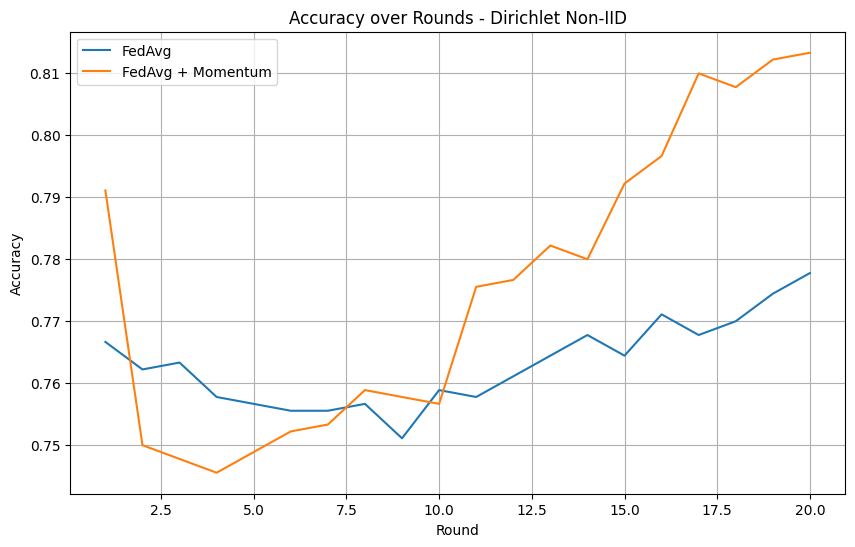

In [4]:
# Create TFF dataset
dirichlet_clients = cf.create_dirichlet_non_iid(df_final, num_clients=5, alpha=0.5, label_col='Maintenance_required')
# Compare on Dirichlet Non-IID data
cf.compare_algorithms(dirichlet_clients, "Dirichlet Non-IID", num_rounds=20)

# Step 5: Create Feature Skew Non-IID Client Partition and run comparisons for FedAvg and FedAvg with Momentum

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Round 1: Accuracy=0.5956
Round 2: Accuracy=0.7089
Round 3: Accuracy=0.7278
Round 4: Accuracy=0.7333
Round 5: Accuracy=0.7389
Round 6: Accuracy=0.7433
Round 7: Accuracy=0.7433
Round 8: Accuracy=0.7467
Round 9: Accuracy=0.7478
Round 10: Accuracy=0.7456
Round 11: Accuracy=0.7467
Round 12: Accuracy=0.7478
Round 13: Accuracy=0.7467
Round 14: Accuracy=0.7511
Round 15: Accuracy=0.7478
Round 16: Accuracy=0.7489
Round 17: Accuracy=0.7500
Round 18: Accuracy=0.7500
Round 19: Accuracy=0.7500
Round 20: Accuracy=0.7511
Round 1: Accuracy=0.6789
Round 2: Accuracy=0.7433
Round 3: Accuracy=0.7433
Round 4: Accuracy=0.7478
Round 5: Accuracy=0.7522
Round 6: Accuracy=0.7467
Round 7: Accuracy=0.7600
Round 8: Accuracy=0.7700
Round 9: Accuracy=0.7656
Round 10: Accuracy=0.7700
Round 11: Accuracy=0.7711
Round 12: Accuracy=0.7767
Round 13: Accuracy=0.7844
Round 14: Accuracy=0.7967
Round 15: Accuracy=0.7956
Round 16: Accuracy=0.7944
Round 17: Accuracy=0.8133
Round 18: Accuracy=0.8133
Round 19: Accuracy=0.8189
Roun

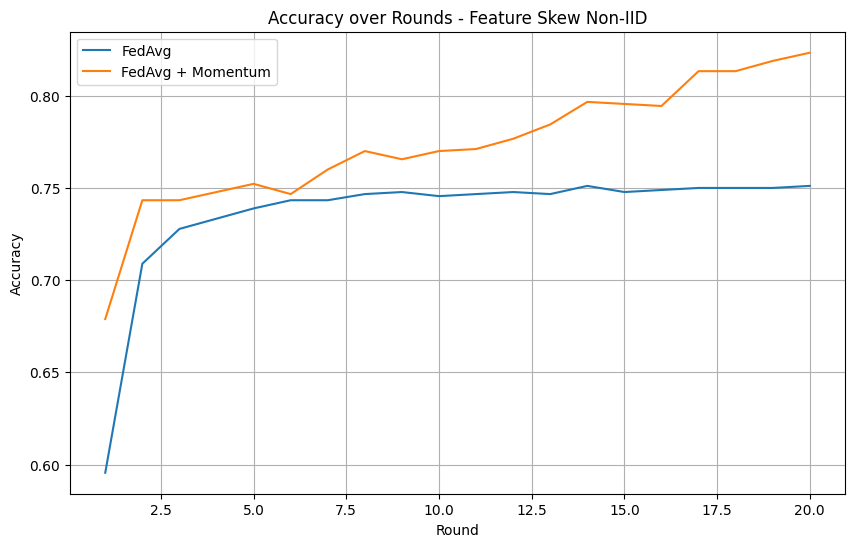

In [5]:
# Create IID dataset
feature_skew_clients = cf.create_feature_skew_non_iid(df_final, num_clients=5, feature='engine_temperature', label_col='Maintenance_required')
# Compare on Feature Skew Non-IID data
cf.compare_algorithms(feature_skew_clients, "Feature Skew Non-IID", num_rounds=20)

# Step 6: Compare All Four Federated Algorithms

Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.11/dist-packages/tensorflow_federated/python/learning/models/keras_utils.py:201: UserWarning: Batch Normalization contains non-trainable variables that won't be updated during the training. Consider using Group Normalization instead.
  warnings.warn(


Round 1: Accuracy=0.5289
Round 2: Accuracy=0.6744
Round 3: Accuracy=0.7311
Round 4: Accuracy=0.7478
Round 5: Accuracy=0.7533
Round 6: Accuracy=0.7556
Round 7: Accuracy=0.7567
Round 8: Accuracy=0.7567
Round 9: Accuracy=0.7578
Round 10: Accuracy=0.7567
Round 11: Accuracy=0.7567
Round 12: Accuracy=0.7567
Round 13: Accuracy=0.7567
Round 14: Accuracy=0.7567
Round 15: Accuracy=0.7556
Round 16: Accuracy=0.7567
Round 17: Accuracy=0.7589
Round 18: Accuracy=0.7556
Round 19: Accuracy=0.7589
Round 20: Accuracy=0.7622
Round 21: Accuracy=0.7600
Round 22: Accuracy=0.7622
Round 23: Accuracy=0.7622
Round 24: Accuracy=0.7633
Round 25: Accuracy=0.7633
Round 26: Accuracy=0.7678
Round 27: Accuracy=0.7678
Round 28: Accuracy=0.7744
Round 29: Accuracy=0.7700
Round 30: Accuracy=0.7733
Round 31: Accuracy=0.7711
Round 32: Accuracy=0.7767
Round 33: Accuracy=0.7778
Round 34: Accuracy=0.7800
Round 35: Accuracy=0.7756
Round 36: Accuracy=0.7856
Round 37: Accuracy=0.7822
Round 38: Accuracy=0.7822
Round 39: Accuracy=0.

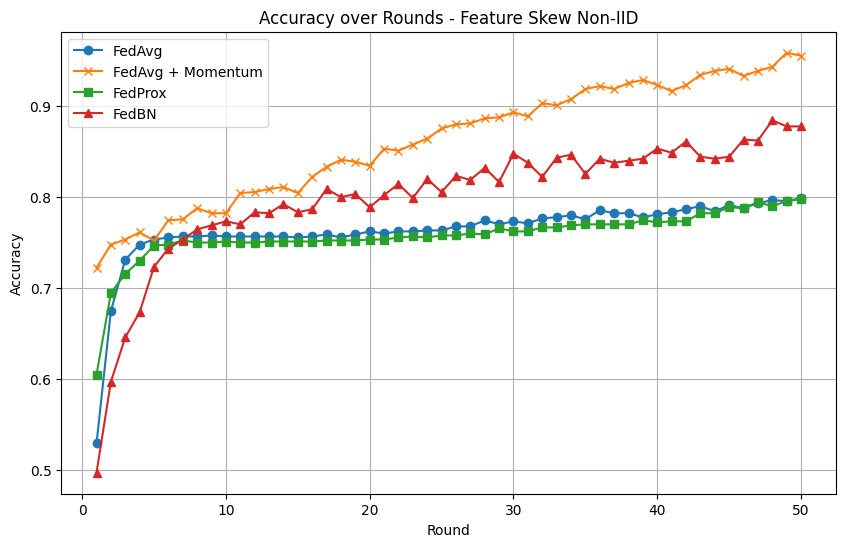

In [6]:
# For Feature Skew Non-IID data, we can also compare all algorithms
# using the compare_all_algorithms function
cf.compare_all_algorithms(feature_skew_clients, "Feature Skew Non-IID", num_rounds=50)